In [1]:
from vacation.model import VCNN
from vacation.data import GalaxyDataset
import numpy as np
import torch

import matplotlib.pyplot as plt

rng = np.random.default_rng(1337)

In [33]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals.h5",
    device="cuda:1",
    max_cache_size="15G",
    cache_loaded=True,
    # index_collection=rng.integers(0, 16813, 10000),
)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Classes', ylabel='Counts'>)

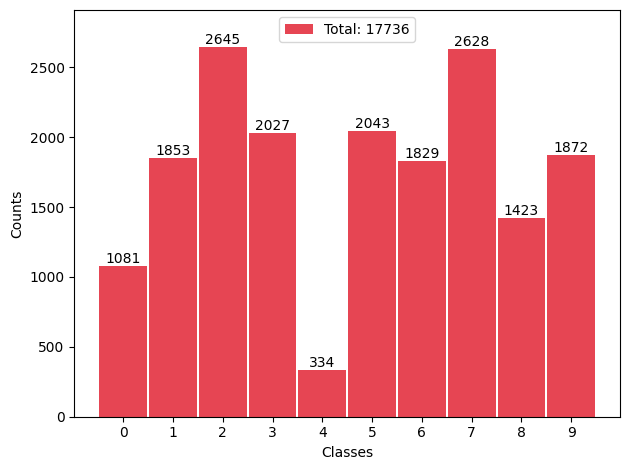

In [34]:
train_ds.plot_distribution()

In [7]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5",
    device="cuda:1",
    max_cache_size="15G",
    cache_loaded=True,
    index_collection=rng.integers(0, 16813, 10000),
)

In [12]:
valid_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5",
    device="cuda:1",
    max_cache_size="4G",
    cache_loaded=True,
    index_collection=rng.integers(0, 4204, 200),
)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Classes', ylabel='Counts'>)

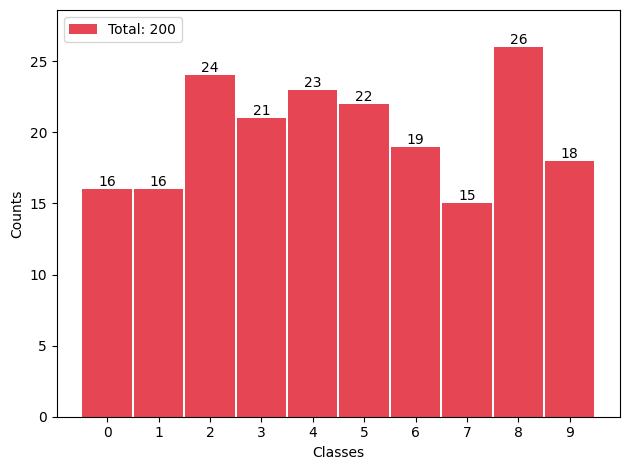

In [13]:
valid_ds.plot_distribution()

In [36]:
model = VCNN.load(
    path=".models/model_10000_3000_v2.pt",
    optimizer=torch.optim.AdamW, 
    activation_func=torch.nn.PReLU, 
    loss_func=torch.nn.CrossEntropyLoss,
    relative_to_package=True
)

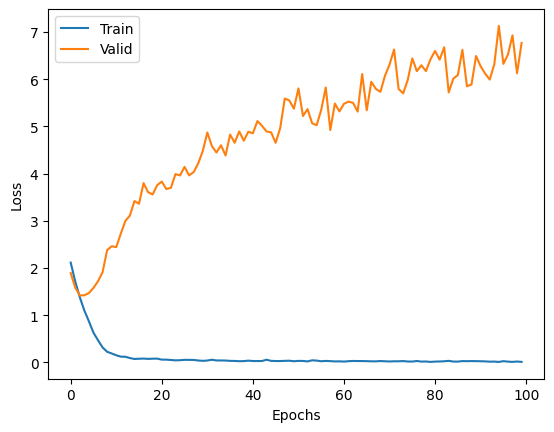

In [5]:
plt.plot(model._loss_metric.train_vals, label="Train")
plt.plot(model._loss_metric.valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

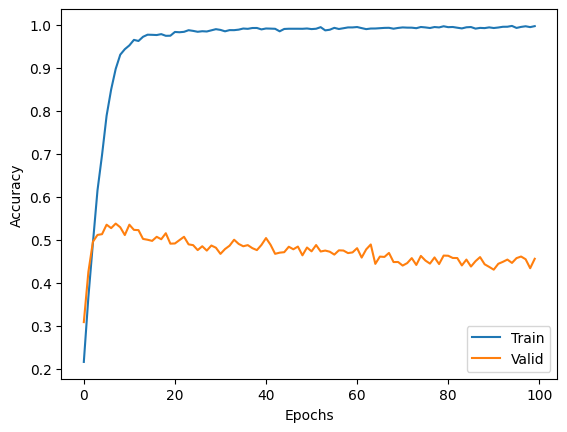

In [6]:
plt.plot(model._metrics["accuracy"].train_vals, label="Train")
plt.plot(model._metrics["accuracy"].valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.auto import tqdm

ERROR! Session/line number was not unique in database. History logging moved to new session 1735


In [30]:
model.model.eval()
y_pred = torch.Tensor([model(valid_ds[int(img)][0][None]).argmax() for img in tqdm(np.arange(0, 200))])

  0%|          | 0/200 [00:00<?, ?it/s]

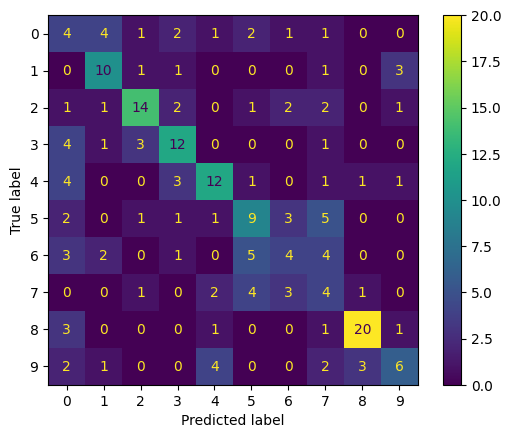

In [32]:
cmatrix = ConfusionMatrixDisplay.from_predictions(y_pred=y_pred.cpu().numpy(), y_true=valid_ds.get_labels().cpu().numpy())